In [2]:
import matplotlib
from plantcv import plantcv as pcv
from plantcv.utils import tabulate_bayes_classes
from plantcv.parallel import WorkflowInputs
import numpy as np

In [3]:
args = WorkflowInputs(
    images=[r"C:\Plant_analysis\notebooks\datasets\side_view\07.jpg"],
    names="image1",
    result="side07.json",
    debug="plot"
)
pcv.params.debug = args.debug
pcv.params.dpi = 100
pcv.params.text_size = 2
pcv.params.text_thickness = 10

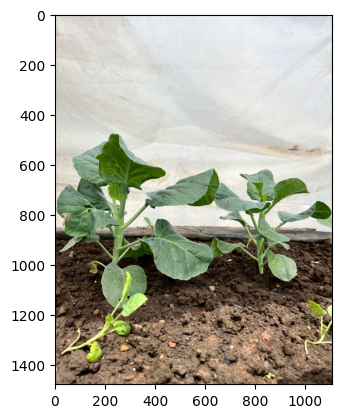

In [4]:
img, path, filename = pcv.readimage(filename=args.image1)

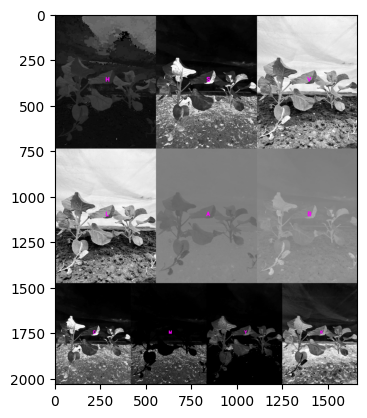

In [5]:
colorspaces = pcv.visualize.colorspaces(rgb_img=img, original_img=False)

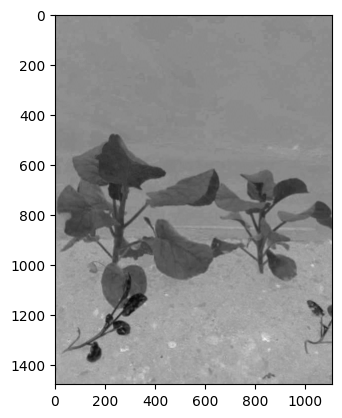

In [6]:
a = pcv.rgb2gray_lab(rgb_img=img, channel='a')

In [7]:
hist = pcv.visualize.histogram(img=a)

alt.Chart(...)

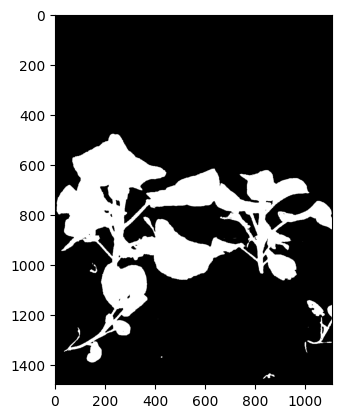

In [8]:
thresh = pcv.threshold.gaussian(gray_img=a, ksize=9000, offset=10,
                                object_type='dark')

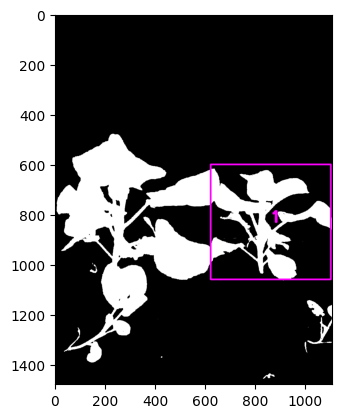

In [9]:
roi = pcv.roi.rectangle(img=thresh, x=620, y=600, w=480, h=460)

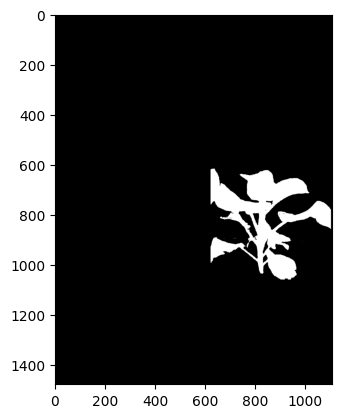

In [10]:
kept_mask = pcv.roi.filter(mask=thresh, roi=roi, roi_type='cutto')

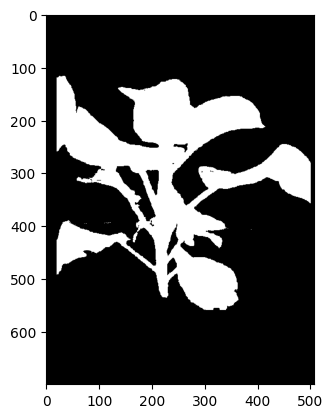

In [11]:
cropped_mask = kept_mask[500:1200, 600:1400] #[y:y2, x1:x2]
cropped_img = img[500:1200, 600:1400]
pcv.plot_image(cropped_mask)

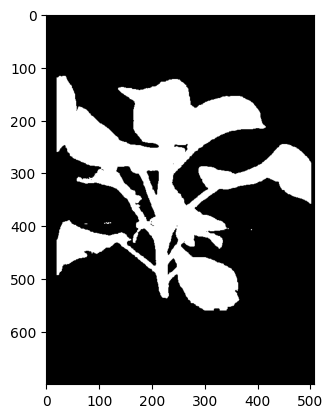

In [12]:
mask_dilated = pcv.dilate(gray_img=cropped_mask, ksize=2, i=1)

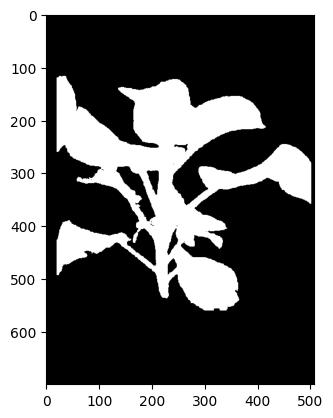

In [23]:
mask_fill = pcv.fill(bin_img=mask_dilated, size=30)
#mask_fill = pcv.fill_holes(bin_img=mask_fill)

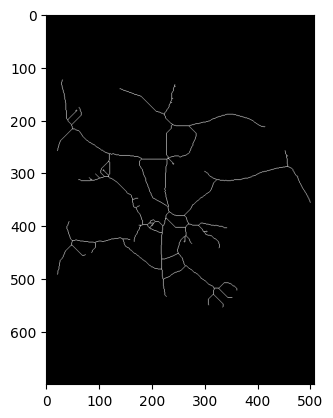

In [24]:
skeleton = pcv.morphology.skeletonize(mask=mask_fill)

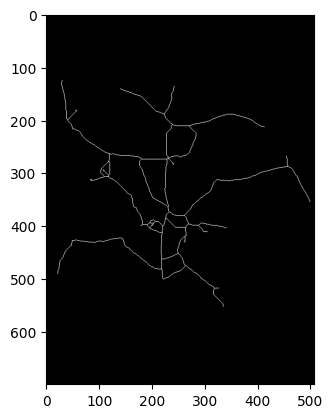

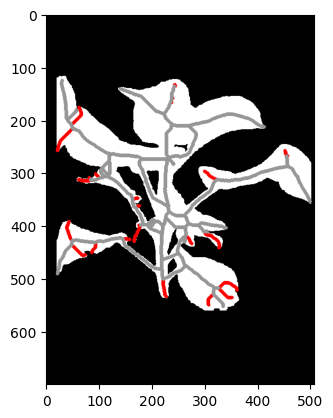

In [25]:
pruned_skel, seg_img, edge_objects = pcv.morphology.prune(skel_img=skeleton, size=100, mask=mask_fill)

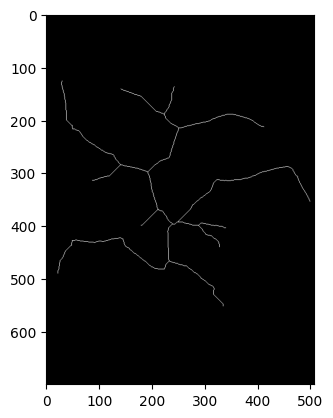

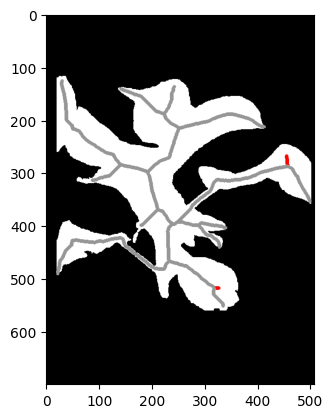

In [16]:
pruned_skel, seg_img, edge_objects = pcv.morphology.prune(skel_img=pruned_skel, size=50, mask=mask_fill)

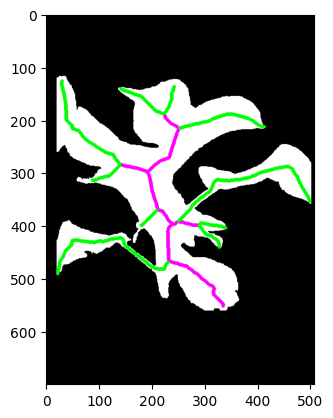

In [17]:
leaf_obj, stem_obj= pcv.morphology.segment_sort(skel_img=pruned_skel, objects=edge_objects, mask=mask_fill)

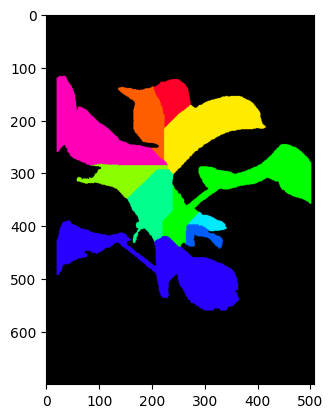

In [18]:
filled_img = pcv.morphology.fill_segments(mask=mask_fill, objects=leaf_obj, label="default")

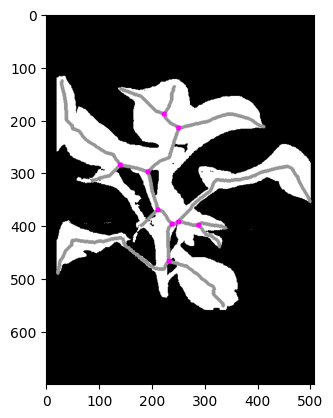

In [19]:
branch_pts_mask = pcv.morphology.find_branch_pts(skel_img=pruned_skel, mask=cropped_mask, label="default")

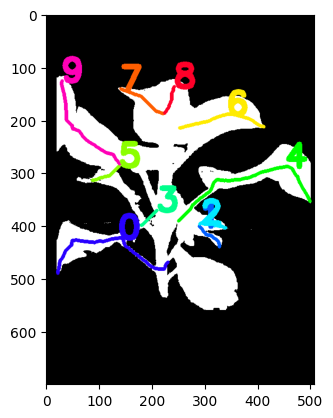

In [20]:
segmented_img, labeled_img = pcv.morphology.segment_id(skel_img=pruned_skel,
                                                       objects=leaf_obj,
                                                       mask=cropped_mask)

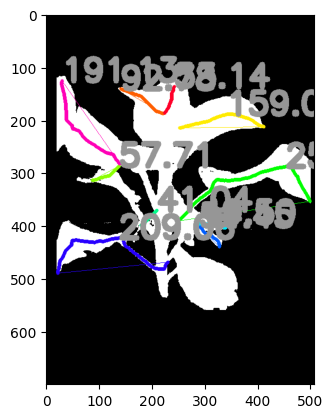

In [21]:
labeled_img = pcv.morphology.segment_euclidean_length(segmented_img=segmented_img, 
                                                      objects=leaf_obj, label="default")

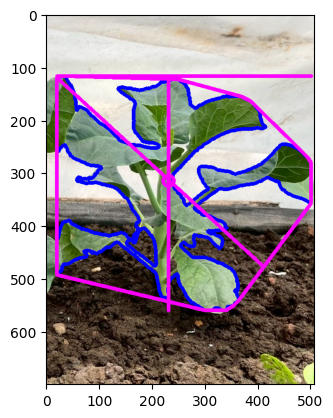

In [22]:
shape_img = pcv.analyze.size(img=cropped_img, labeled_mask=mask_fill, label="default")